In [1]:
## importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,RepeatedKFold,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from tqdm import tqdm

In [2]:
## loading the training and testing dataset 
train_data=pd.read_csv("../input/tabular-playground-series-jan-2021/train.csv")
test_data=pd.read_csv("../input/tabular-playground-series-jan-2021/test.csv")

In [38]:
print("Training dataset")
display(train_data.head())
print("")
print("Testing Dataset")
display(test_data.head())

Training dataset


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046



Testing Dataset


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


### Basic Descriptive statistics

In [5]:
print("Number of Rows in the training Dataset :",train_data.shape[0])
print("NUmber of Rows in the Testing Dataset :",test_data.shape[0])

print("Number of Columns in the Training dataset :",train_data.shape[1])
print("Number of Columns in the Testing Dataset :",test_data.shape[1])

Number of Rows in the training Dataset : 300000
NUmber of Rows in the Testing Dataset : 200000
Number of Columns in the Training dataset : 16
Number of Columns in the Testing Dataset : 15


In [6]:
## descriptive stats of training dataset 
train_data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,249825.145857,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,144476.732562,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,1.000000,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,124656.500000,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,249738.500000,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,374836.250000,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,499999.000000,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


In [7]:
### describing about the test dataset
test_data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,250261.031215,0.507222,0.498080,0.521381,0.514801,0.502274,0.526987,0.487722,0.525284,0.460257,0.520478,0.484187,0.506763,0.554390,0.503174
std,144128.894365,0.204220,0.227866,0.200656,0.232995,0.220812,0.218145,0.180805,0.216084,0.197217,0.201645,0.219972,0.218598,0.229730,0.208333
min,0.000000,-0.061638,-0.030548,0.040867,0.153318,0.276679,0.075104,-0.024760,0.219631,-0.231308,-0.109759,0.078859,0.094504,0.015367,0.164500
25%,125538.250000,0.343649,0.322703,0.344251,0.294361,0.284113,0.356357,0.347336,0.342148,0.330739,0.375496,0.301236,0.310875,0.350956,0.308210
50%,250389.500000,0.484292,0.553147,0.551413,0.482019,0.451960,0.471000,0.466392,0.483781,0.416900,0.458622,0.442037,0.485527,0.491538,0.431124
75%,375240.250000,0.644079,0.686518,0.648656,0.747133,0.670831,0.694422,0.580666,0.685070,0.575248,0.700157,0.677691,0.694630,0.769323,0.712664
max,499990.000000,1.017577,0.853813,1.001791,0.997446,1.033722,1.046715,1.054225,1.026280,1.001405,1.140639,1.023151,1.049417,0.977223,0.868679


### Checking tthe Missing values 

In [9]:
print("MIssing values in the Training Dataset :",train_data.isna().sum().sum())
print("Total Missing values in the Testing Dataset :",test_data.isna().sum().sum())

MIssing values in the Training Dataset : 0
Total Missing values in the Testing Dataset : 0


In [4]:
## Droping the misteseaus value from the dataset 
train_data.drop(train_data.loc[train_data.target<=0].index,axis=0,inplace=True)

In [5]:
train_data.reset_index(drop=True,inplace=True)

## Exploratory Data Analysis

**Univariate Analysis : Target**
- let see how the target variable is distributed

Text(0.5, 1.0, 'Boxplot of Target variable')

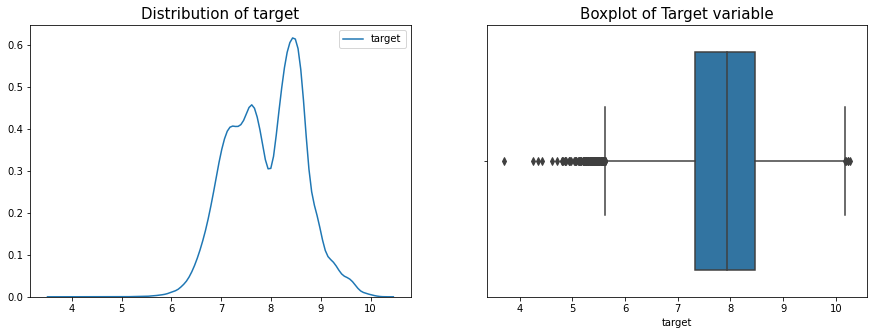

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sbn.kdeplot(train_data.target)
plt.title("Distribution of target",size=15)
plt.subplot(122)
sbn.boxplot(train_data.target)
plt.title("Boxplot of Target variable",size=15)

- The distribution is not following the Normal distribution 

**why we care about the predicator , or target variables need to to follow Normal distribution?**
- IT is easier to decribe about the data
- The entire distribution is describe by the two number i.e standard deviation and mean
- it makes maths simple.
- It is good to reduce the outlier effect.


- In training u can use transformation techniques like box-cos, log,sqrt to get a normal distribution 
- At the time predition u can convert by using inverse transormation to get the actual values.

If we are using the linear regression:
- let we have all the predicators and target are following the gaussian distribution .then resultant resgreesion line will suffer from little variance when predicting on unseen data.

So usually if features is follows a close normal distribution then the model will perform well.

### Plot the distribution from count1 to count7 predicators


Text(0.5, 0.98, 'The Distribution first 7 Predicators')

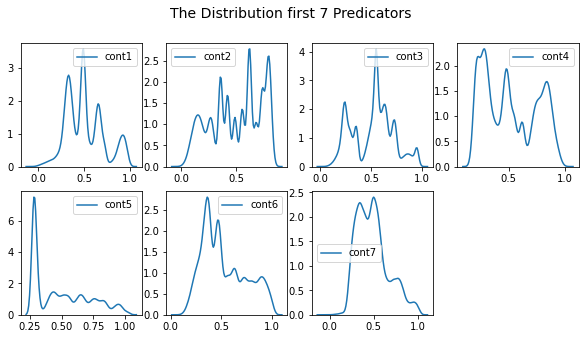

In [18]:
plt.figure(figsize=(10,5))
for i in range(1,8):
    plt.subplot(240+i)
    sbn.kdeplot(train_data.iloc[:,i])
plt.suptitle("The Distribution first 7 Predicators",size=14)

Text(0.5, 0.98, 'The Distribution first 7 Predicators')

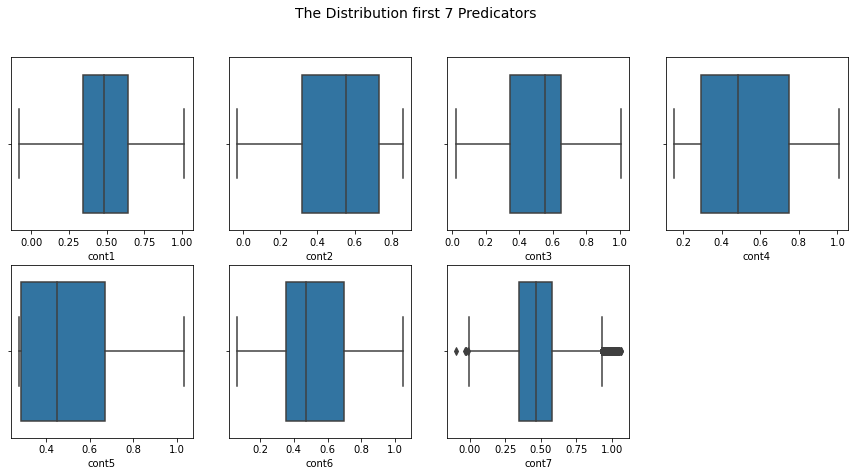

In [19]:
plt.figure(figsize=(15,7))
for i in range(1,8):
    plt.subplot(240+i)
    sbn.boxplot(train_data.iloc[:,i])
plt.suptitle("The Distribution first 7 Predicators",size=14)

### Plotting the distribution of count8 to count 14

Text(0.5, 0.98, 'The Distribution Next 7 Predicators')

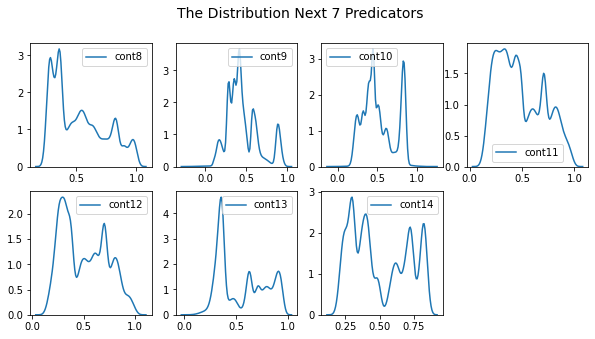

In [20]:
plt.figure(figsize=(10,5))
for i in range(1,8):
    plt.subplot(240+i)
    sbn.kdeplot(train_data.iloc[:,i+7])
plt.suptitle("The Distribution Next 7 Predicators",size=14)

Text(0.5, 0.98, 'Boxplots of Next 7 Predicators')

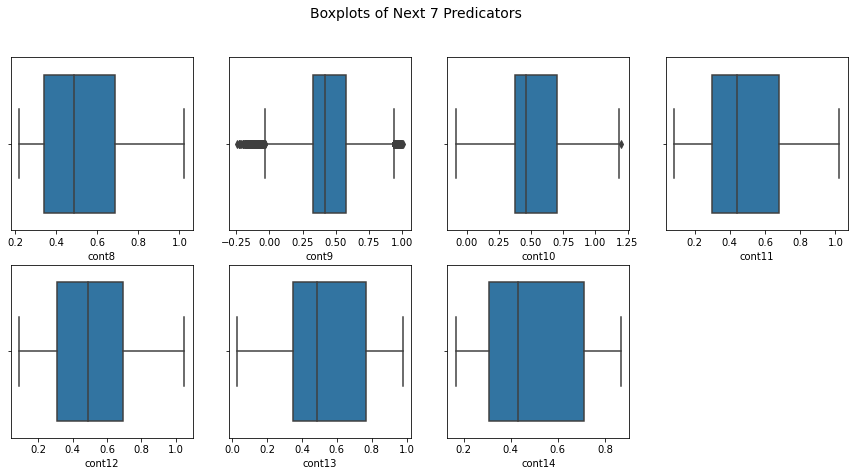

In [21]:
plt.figure(figsize=(15,7))
for i in range(1,8):
    plt.subplot(240+i)
    sbn.boxplot(train_data.iloc[:,i+7])
plt.suptitle("Boxplots of Next 7 Predicators",size=14)

- There are some outliers in the count_7 and count_9 

**Algorithms :**
- Linear regression, svm not robust to outliers
- Tree based algorthim like Gradient boosting, Random Forest are robust to outliers

**If we are planning to use the linear regression or svm then we need to handle the outlier instead of removing the ouliers use some transformation techniques or adjusting the esteeems**


### Treatment of Outliers
- The Predicators cont7 and cont9 has an outliers 
- And also Target variable also got some outliers

Actually Tree based Methods are robust to Ouliers So we are not going to treat them and not sure about Target variable

**Even though Applied some trasformations to change the distribution as well as the adjust the outlier , there will be no use**

### Correlation Matrix

- This will tells how the relation between the features and also it will tells relation betweent the features and Targets.
- If you want to know the relation beween the features visulally you can use the scatter plots

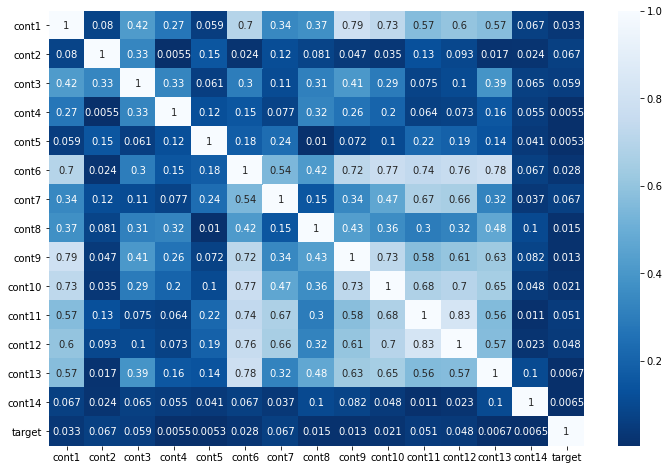

In [22]:
### lets define the correlation between the variables 
corr=train_data.iloc[:,1:].corr().abs()
### heatmap the highly correlated variables
plt.figure(figsize=(12,8))
sbn.heatmap(corr,cmap="Blues_r",annot=True)

### Getting top 10 highly correlated variables

In [23]:
columns=list(corr.index)
corel=corr.values
var1=[]
var2=[]
value=[]
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        var1.append(columns[i])
        var2.append(columns[j])
        value.append(corel[i,j])
corr_df=pd.DataFrame()
corr_df["var1"]=var1
corr_df["var2"]=var2
corr_df["value"]=value
corr_df.sort_values(ascending=False,by="value",inplace=True)

In [24]:
corr_df.head(10)

,var1,var2,value
95,cont11,cont12,0.825868
7,cont1,cont9,0.794002
66,cont6,cont13,0.783604
63,cont6,cont10,0.770628
65,cont6,cont12,0.757105
64,cont6,cont11,0.737494
84,cont9,cont10,0.725053
8,cont1,cont10,0.725039
62,cont6,cont9,0.716613
91,cont10,cont12,0.701871


- Here the Predicator copunt1 ---> has high correlation with the count12,count9,count10
- and count6--> exhibits high correlation with the count13, count10, count12, count10, count12

**Having the Multicorrelated varible doesn't effect the predictive power of a model .There will effect in the coefficient of the features. SO that if we have a Mulitcorrelated variable we cann't interpret the model properly**

-> so Linear regression or ridge or lasso regressions are not robust with the highly correlated varible

In [25]:
## Lets observe the  relation between the target variable and other features 
corr_df.loc[corr_df.var2=="target"].sort_values(by="value",ascending=False)

,var1,var2,value
76,cont7,target,0.067218
26,cont2,target,0.067152
38,cont3,target,0.058970
98,cont11,target,0.050977
101,cont12,target,0.047782
13,cont1,target,0.033040
68,cont6,target,0.027935
94,cont10,target,0.021182
83,cont8,target,0.014698
89,cont9,target,0.013095


- There is no strong relation between the features and target variable.

### Comparing the Distributions of  Features in Training and Testing dataset
- Generally we will make an assumption that the unseen data will come from the same distribution as Training data.
- But in real cases it not possible always 
- Mostly we can see the different distribution of datataset in time series problems. because the data will be varies with the time.

Lets check!!

Text(0.5, 0.98, 'The Distributions of Features in Training and Testing dataset :')

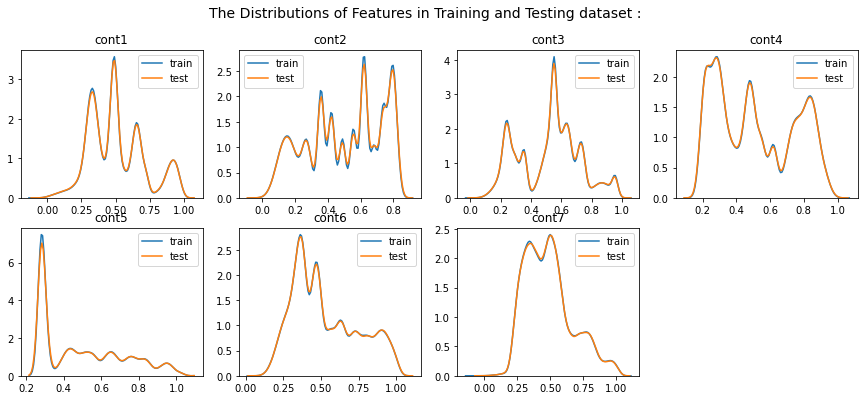

In [26]:
## LEts checking the first 7 feattures from both the datasets
plt.figure(figsize=(15,6))
for i in range(1,8):
    plt.subplot(240+i)
    sbn.kdeplot(train_data.iloc[:,i],label="train")
    sbn.kdeplot(test_data.iloc[:,i],label="test")
    plt.title(columns[i-1])
plt.suptitle("The Distributions of Features in Training and Testing dataset :",size=14)

Text(0.5, 0.98, 'The Distributions of Features in Training and Testing dataset :')

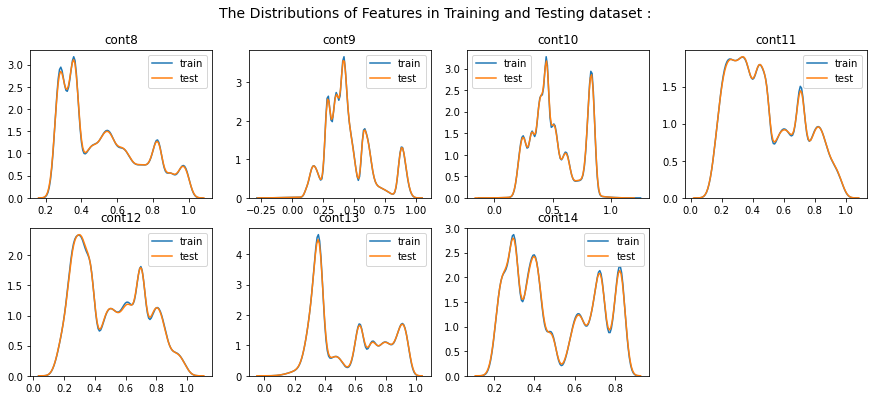

In [27]:
plt.figure(figsize=(15,6))
for i in range(1,8):
    plt.subplot(240+i)
    sbn.kdeplot(train_data.iloc[:,i+7],label="train")
    sbn.kdeplot(test_data.iloc[:,i+7],label="test")
    plt.title(columns[i+6])
plt.suptitle("The Distributions of Features in Training and Testing dataset :",size=14)

- Seems to be training dataset and testing dataset are came from the same distributions

**What if we have a different distribution . how to deal with that**

There are different methods to solve this :
using subsampling  https://maxhalford.github.io/blog/subsampling-1/
    - reweighting the training data so that the distribution of training is closer to the distribution of test using Kullback-Leibler Importance Estimation Procedure 

## Feature Engineering
- creating some aggreate features 
- like mean, max , min, standardeviation, kurtosis , median , skew

In [6]:
def Feature_engineering(data):
    Agg_df=pd.DataFrame()
    Agg_df["mean"]=data.mean(axis=1)
    Agg_df["max"]=data.max(axis=1)
    Agg_df["min"]=data.min(axis=1)
    Agg_df["std"]=data.std(axis=1)
    Agg_df["kurtosis"]=data.kurtosis(axis=1)
    Agg_df["median"]=data.median(axis=1)
    Agg_df["skew"]=data.skew(axis=1)
    Agg_df["feat1"]=train_data.cont5+train_data.cont4+train_data.cont11+train_data.cont3
    Agg_df["feat2"]=train_data.cont2+train_data.cont7+train_data.cont11+train_data.cont3
    Agg_df["feat3"]=train_data.cont7*train_data.cont2*train_data.cont3
    Agg_df["feat4"]=train_data.cont7*train_data.cont2*train_data.cont11
    Agg_df["feat5"]=train_data.cont7*train_data.cont2*train_data.cont12
    Agg_df["feat6"]=train_data.cont7*train_data.cont2*train_data.cont6
    return Agg_df


In [7]:
agg_df=Feature_engineering(train_data.iloc[:,1:-1])

Text(0.5, 0.98, 'The Distribution of Agregated Features')

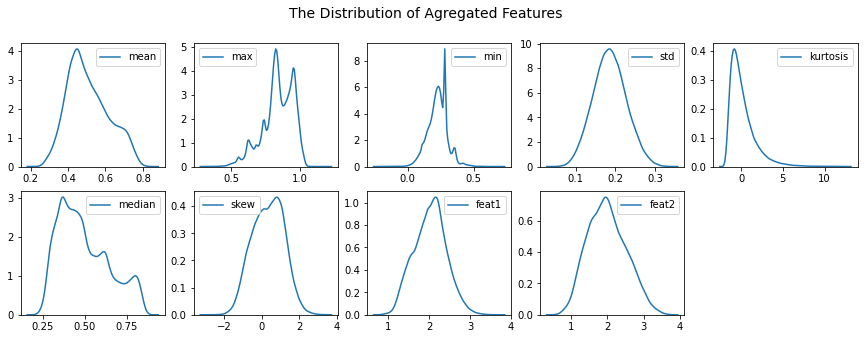

In [47]:
plt.figure(figsize=(15,5))
for i in range(9):
    plt.subplot(250+i+1)
    sbn.kdeplot(agg_df.iloc[:,i])
plt.suptitle("The Distribution of Agregated Features",size=14)

- Some of the Features are following the colse to the normal distribution that are mean , skew,std

In [52]:
agg_df.corrwith(train_data.target)

mean        0.034809
max         0.052264
min         0.027306
std         0.038154
kurtosis   -0.019561
median      0.024561
skew       -0.010833
feat1       0.058415
feat2       0.095333
feat3       0.091636
feat4       0.071626
feat5       0.074404
feat6       0.067084
dtype: float64

- These features are also doesn't maintain the good relationship with the target variable.

In [53]:
agg_df.corr()

,mean,max,min,std,kurtosis,median,skew,feat1,feat2,feat3,feat4,feat5,feat6
mean,1.000000,0.626683,0.507015,0.394765,-0.359507,0.965734,-0.794783,0.563585,0.574608,0.310084,0.680084,0.691768,0.737792
max,0.626683,1.000000,0.195574,0.758871,-0.014967,0.511520,-0.183168,0.540607,0.361910,0.240324,0.387157,0.393848,0.403982
min,0.507015,0.195574,1.000000,-0.270818,-0.167006,0.431367,-0.158047,0.448077,0.546318,0.433359,0.493223,0.504947,0.515755
std,0.394765,0.758871,-0.270818,1.000000,-0.273091,0.326688,-0.222187,0.265285,0.106937,0.026014,0.158419,0.156093,0.156651
kurtosis,-0.359507,-0.014967,-0.167006,-0.273091,1.000000,-0.335043,0.518366,-0.152953,-0.268734,-0.184759,-0.232020,-0.244519,-0.222896
median,0.965734,0.511520,0.431367,0.326688,-0.335043,1.000000,-0.849142,0.456030,0.520421,0.245171,0.653707,0.663573,0.715277
skew,-0.794783,-0.183168,-0.158047,-0.222187,0.518366,-0.849142,1.000000,-0.275613,-0.370024,-0.128912,-0.518571,-0.525838,-0.574221
feat1,0.563585,0.540607,0.448077,0.265285,-0.152953,0.456030,-0.275613,1.000000,0.516234,0.396762,0.429167,0.397348,0.368981
feat2,0.574608,0.361910,0.546318,0.106937,-0.268734,0.520421,-0.370024,0.516234,1.000000,0.861206,0.855503,0.830190,0.780963
feat3,0.310084,0.240324,0.433359,0.026014,-0.184759,0.245171,-0.128912,0.396762,0.861206,1.000000,0.727694,0.731460,0.653770


- The variable "skew" and "median" has high correlation
- The "mean" is high correlated with the 25_quantile and 75_quantiles and with median

## Experiment 1: with out adding derived Features

### 1. Decision Trees

In [9]:
import time

In [46]:
x=train_data.drop(columns=["id","target"])
#x=pd.concat([x,agg_df.iloc[:,:]],axis=1)
y=train_data["target"]



In [47]:
### splitting the dataset 
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
print("The shape of the training set :",x_train.shape,y_train.shape)
print("The shape of the validation set :",x_val.shape,y_val.shape)


The shape of the training set : (239999, 14) (239999,)
The shape of the validation set : (60000, 14) (60000,)


In [101]:
time.time()

1611715059.0203304

## Algorithm Selection and Model Selection using k-fold

In [126]:
%%time

dt=DecisionTreeRegressor(max_depth=8)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
i=0
score_train=[]
score_test=[]

for train_ind,test_ind in cv.split(x):
    start=time.time()
    i+=1
    print("{}st Fold".format(i))
    x_train=x.iloc[train_ind,]
    y_train=y[train_ind]
    x_val=x.iloc[test_ind,]
    y_val=y[test_ind]
    dt.fit(x_train,y_train)

    y_train_pre=dt.predict(x_train)
    y_val_pre=dt.predict(x_val)
    tr_error=np.sqrt(metrics.mean_squared_error(y_train,y_train_pre))
    te_error=np.sqrt(metrics.mean_squared_error(y_val,y_val_pre))
    score_test.append(te_error)
    score_train.append(tr_error)
    print("-------------->time taken {0:.2f} sec".format(time.time()-start))
    

print("="*50)
print("The Total Training  Error is :",sum(score_train)/len(score_train))
print("The Total validation Error is :",sum(score_test)/len(score_test))



1st Fold
-------------->time taken 10.27 sec
2st Fold
-------------->time taken 11.83 sec
3st Fold
-------------->time taken 12.33 sec
4st Fold
-------------->time taken 11.93 sec
5st Fold
-------------->time taken 12.81 sec
The Total Training  Error is : 0.7134010291506941
The Total validation Error is : 0.7198547948960519
CPU times: user 59.1 s, sys: 22 ms, total: 59.2 s
Wall time: 59.2 s


### Random Forest Model Selection

In [129]:
%%time
rf=RandomForestRegressor(max_depth=10,n_estimators=30,n_jobs=-1)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
i=0
score_train=[]
score_test=[]

for train_ind,test_ind in cv.split(x):
    start=time.time()
    i+=1
    print("{}st Fold".format(i))
    x_train=x.iloc[train_ind,]
    y_train=y[train_ind]
    x_val=x.iloc[test_ind,]
    y_val=y[test_ind]
    ## fitting the dataset 
    rf.fit(x_train,y_train)

    y_train_pre=rf.predict(x_train)
    y_val_pre=rf.predict(x_val)
    tr_error=np.sqrt(metrics.mean_squared_error(y_train,y_train_pre))
    te_error=np.sqrt(metrics.mean_squared_error(y_val,y_val_pre))
    score_test.append(te_error)
    score_train.append(tr_error)
    print("-------------->time taken {0:.2f} sec".format(time.time()-start))
    

print("="*50)
print("The Total Training  Error is :",sum(score_train)/len(score_train))
print("The Total validation Error is :",sum(score_test)/len(score_test))


1st Fold
-------------->time taken 86.90 sec
2st Fold
-------------->time taken 86.29 sec
3st Fold
-------------->time taken 83.83 sec
4st Fold
-------------->time taken 86.58 sec
5st Fold
-------------->time taken 85.92 sec
The Total Training  Error is : 0.6952804587056448
The Total validation Error is : 0.7109634064221406
CPU times: user 26min 39s, sys: 908 ms, total: 26min 40s
Wall time: 7min 9s


### XGboost Regressor

In [74]:
%%time
xgb=XGBRegressor(n_estimators=4000,learning_rate=0.01,max_depth=3,tree_method='gpu_hist')
cv = KFold(n_splits=5, random_state=1, shuffle=True)
i=0
score_train=[]
score_test=[]

for train_ind,test_ind in cv.split(x):
    start=time.time()
    i+=1
    print("{}st Fold".format(i))
    x_train=x.iloc[train_ind,]
    y_train=y[train_ind]
    x_val=x.iloc[test_ind,]
    y_val=y[test_ind]
    ## fitting the dataset 
    xgb.fit(x_train,y_train)
    
    ## prediction
    y_train_pre=xgb.predict(x_train)
    y_val_pre=xgb.predict(x_val)
    ##
    ## error metric
    tr_error=np.sqrt(metrics.mean_squared_error(y_train,y_train_pre))
    te_error=np.sqrt(metrics.mean_squared_error(y_val,y_val_pre))
    score_test.append(te_error)
    score_train.append(tr_error)
    print("-------------->time taken {0:.2f} sec".format(time.time()-start))
    

print("="*50)
print("The Total Training  Error is :",sum(score_train)/len(score_train))
print("The Total validation Error is :",sum(score_test)/len(score_test))


1st Fold
-------------->time taken 28.56 sec
2st Fold
-------------->time taken 28.76 sec
3st Fold
-------------->time taken 29.15 sec
4st Fold
-------------->time taken 28.77 sec
5st Fold
-------------->time taken 28.88 sec
The Total Training  Error is : 0.6992700026226611
The Total validation Error is : 0.7039733313419428
CPU times: user 4min 13s, sys: 479 ms, total: 4min 14s
Wall time: 2min 24s


### Creating a submission File.

In [68]:
regressor = XGBRegressor(
                 colsample_bytree=0.5,
                 alpha=0.01563,
                 #gamma=0.0,
                 learning_rate=0.01,
                 max_depth=10,
                 min_child_weight=257,
                 n_estimators=4000,                                                                  
                 #reg_alpha=0.9,
                 reg_lambda=0.003,
                 subsample=0.7,
                 random_state=2020,
                 metric_period=100,
                 tree_method='gpu_hist',
                 silent=1)

regressor.fit(x_train, y_train, early_stopping_rounds=6, eval_set=[(x_val, y_val)], verbose=1)

[06:47:29] WARNING: ../src/learner.cc:516: 
Parameters: { metric_period, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:7.36509
Will train until validation_0-rmse hasn't improved in 6 rounds.
[1]	validation_0-rmse:7.29209
[2]	validation_0-rmse:7.21984
[3]	validation_0-rmse:7.14832
[4]	validation_0-rmse:7.07752
[5]	validation_0-rmse:7.00742
[6]	validation_0-rmse:6.93803
[7]	validation_0-rmse:6.86935
[8]	validation_0-rmse:6.80137
[9]	validation_0-rmse:6.73408
[10]	validation_0-rmse:6.66746
[11]	validation_0-rmse:6.60151
[12]	validation_0-rmse:6.53623
[13]	validation_0-rmse:6.47162
[14]	validation_0-rmse:6.40763
[15]	validation_0-rmse:6.34430
[16]	validation_0-rmse:6.28161
[17]	validation_0-rmse:6.21956
[18]	validation_0-rmse:6.15814
[19]	validation_

[247]	validation_0-rmse:0.93149
[248]	validation_0-rmse:0.92748
[249]	validation_0-rmse:0.92353
[250]	validation_0-rmse:0.91963
[251]	validation_0-rmse:0.91581
[252]	validation_0-rmse:0.91204
[253]	validation_0-rmse:0.90833
[254]	validation_0-rmse:0.90468
[255]	validation_0-rmse:0.90110
[256]	validation_0-rmse:0.89757
[257]	validation_0-rmse:0.89409
[258]	validation_0-rmse:0.89067
[259]	validation_0-rmse:0.88731
[260]	validation_0-rmse:0.88399
[261]	validation_0-rmse:0.88072
[262]	validation_0-rmse:0.87751
[263]	validation_0-rmse:0.87438
[264]	validation_0-rmse:0.87128
[265]	validation_0-rmse:0.86821
[266]	validation_0-rmse:0.86522
[267]	validation_0-rmse:0.86229
[268]	validation_0-rmse:0.85938
[269]	validation_0-rmse:0.85653
[270]	validation_0-rmse:0.85372
[271]	validation_0-rmse:0.85095
[272]	validation_0-rmse:0.84825
[273]	validation_0-rmse:0.84558
[274]	validation_0-rmse:0.84297
[275]	validation_0-rmse:0.84039
[276]	validation_0-rmse:0.83786
[277]	validation_0-rmse:0.83537
[278]	va

[504]	validation_0-rmse:0.70177
[505]	validation_0-rmse:0.70173
[506]	validation_0-rmse:0.70170
[507]	validation_0-rmse:0.70165
[508]	validation_0-rmse:0.70161
[509]	validation_0-rmse:0.70159
[510]	validation_0-rmse:0.70155
[511]	validation_0-rmse:0.70151
[512]	validation_0-rmse:0.70148
[513]	validation_0-rmse:0.70144
[514]	validation_0-rmse:0.70141
[515]	validation_0-rmse:0.70138
[516]	validation_0-rmse:0.70135
[517]	validation_0-rmse:0.70132
[518]	validation_0-rmse:0.70130
[519]	validation_0-rmse:0.70126
[520]	validation_0-rmse:0.70123
[521]	validation_0-rmse:0.70121
[522]	validation_0-rmse:0.70118
[523]	validation_0-rmse:0.70115
[524]	validation_0-rmse:0.70112
[525]	validation_0-rmse:0.70109
[526]	validation_0-rmse:0.70106
[527]	validation_0-rmse:0.70103
[528]	validation_0-rmse:0.70100
[529]	validation_0-rmse:0.70098
[530]	validation_0-rmse:0.70095
[531]	validation_0-rmse:0.70093
[532]	validation_0-rmse:0.70090
[533]	validation_0-rmse:0.70088
[534]	validation_0-rmse:0.70085
[535]	va

[761]	validation_0-rmse:0.69839
[762]	validation_0-rmse:0.69839
[763]	validation_0-rmse:0.69838
[764]	validation_0-rmse:0.69838
[765]	validation_0-rmse:0.69838
[766]	validation_0-rmse:0.69837
[767]	validation_0-rmse:0.69837
[768]	validation_0-rmse:0.69837
[769]	validation_0-rmse:0.69836
[770]	validation_0-rmse:0.69836
[771]	validation_0-rmse:0.69835
[772]	validation_0-rmse:0.69835
[773]	validation_0-rmse:0.69834
[774]	validation_0-rmse:0.69833
[775]	validation_0-rmse:0.69833
[776]	validation_0-rmse:0.69833
[777]	validation_0-rmse:0.69832
[778]	validation_0-rmse:0.69832
[779]	validation_0-rmse:0.69831
[780]	validation_0-rmse:0.69831
[781]	validation_0-rmse:0.69830
[782]	validation_0-rmse:0.69830
[783]	validation_0-rmse:0.69829
[784]	validation_0-rmse:0.69828
[785]	validation_0-rmse:0.69827
[786]	validation_0-rmse:0.69827
[787]	validation_0-rmse:0.69827
[788]	validation_0-rmse:0.69826
[789]	validation_0-rmse:0.69825
[790]	validation_0-rmse:0.69824
[791]	validation_0-rmse:0.69824
[792]	va

[1017]	validation_0-rmse:0.69735
[1018]	validation_0-rmse:0.69735
[1019]	validation_0-rmse:0.69735
[1020]	validation_0-rmse:0.69735
[1021]	validation_0-rmse:0.69735
[1022]	validation_0-rmse:0.69735
[1023]	validation_0-rmse:0.69734
[1024]	validation_0-rmse:0.69733
[1025]	validation_0-rmse:0.69733
[1026]	validation_0-rmse:0.69733
[1027]	validation_0-rmse:0.69733
[1028]	validation_0-rmse:0.69732
[1029]	validation_0-rmse:0.69732
[1030]	validation_0-rmse:0.69732
[1031]	validation_0-rmse:0.69732
[1032]	validation_0-rmse:0.69731
[1033]	validation_0-rmse:0.69731
[1034]	validation_0-rmse:0.69731
[1035]	validation_0-rmse:0.69730
[1036]	validation_0-rmse:0.69730
[1037]	validation_0-rmse:0.69730
[1038]	validation_0-rmse:0.69730
[1039]	validation_0-rmse:0.69730
[1040]	validation_0-rmse:0.69730
[1041]	validation_0-rmse:0.69729
[1042]	validation_0-rmse:0.69729
[1043]	validation_0-rmse:0.69729
[1044]	validation_0-rmse:0.69729
[1045]	validation_0-rmse:0.69729
[1046]	validation_0-rmse:0.69729
[1047]	val

[1266]	validation_0-rmse:0.69671
[1267]	validation_0-rmse:0.69671
[1268]	validation_0-rmse:0.69670
[1269]	validation_0-rmse:0.69670
[1270]	validation_0-rmse:0.69670
[1271]	validation_0-rmse:0.69670
[1272]	validation_0-rmse:0.69669
[1273]	validation_0-rmse:0.69670
[1274]	validation_0-rmse:0.69670
[1275]	validation_0-rmse:0.69670
[1276]	validation_0-rmse:0.69669
[1277]	validation_0-rmse:0.69669
[1278]	validation_0-rmse:0.69669
[1279]	validation_0-rmse:0.69669
[1280]	validation_0-rmse:0.69669
[1281]	validation_0-rmse:0.69668
[1282]	validation_0-rmse:0.69668
[1283]	validation_0-rmse:0.69668
[1284]	validation_0-rmse:0.69668
[1285]	validation_0-rmse:0.69668
[1286]	validation_0-rmse:0.69668
[1287]	validation_0-rmse:0.69667
[1288]	validation_0-rmse:0.69667
[1289]	validation_0-rmse:0.69667
[1290]	validation_0-rmse:0.69666
[1291]	validation_0-rmse:0.69666
[1292]	validation_0-rmse:0.69666
[1293]	validation_0-rmse:0.69666
[1294]	validation_0-rmse:0.69666
[1295]	validation_0-rmse:0.69666
[1296]	val

XGBRegressor(alpha=0.01563, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             gamma=0, gpu_id=0, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, metric_period=100, min_child_weight=257, missing=nan,
             monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
             n_estimators=4000, n_jobs=0, num_parallel_tree=1,
             random_state=2020, reg_alpha=0.0156299993, reg_lambda=0.003,
             scale_pos_weight=1, silent=1, subsample=0.7,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [69]:
#aa=Feature_engineering(test_data.iloc[:,1:])
#x_test=pd.concat([test_data,aa],axis=1)
test_pre=regressor.predict(test_data.iloc[:,1:])

In [58]:
val_pre=regressor.predict(x_train)
mse=metrics.mean_squared_error(y_train,val_pre)
np.sqrt(np.abs(mse))

0.6875332471431729

In [71]:
submit=pd.DataFrame()
submit["id"]=test_data["id"]
submit["target"]=test_pre

In [72]:
submit.to_csv("submission1.csv",index=False)